In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps
import seaborn as sns
from citipy import citipy
from scipy.stats import linregress

In [76]:
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
google_key = os.getenv("google_key")
# Configure gmaps
gmaps.configure(api_key=google_key)

In [77]:
quake_df = pd.read_csv("../data/all_earthquake_data2.zip")

quake_df.head()

,time,latitude,longitude,mag,place
0,1969-12-13T18:59:11.430Z,19.313000,-155.104000,2.78,"17 km S of Fern Forest, Hawaii"
1,1969-12-13T17:55:57.400Z,46.709000,-119.234333,1.60,"13 km SSW of Othello, Washington"
2,1969-12-13T13:03:04.570Z,19.466667,-155.487667,1.94,"26 km W of Volcano, Hawaii"
3,1969-12-13T12:53:50.580Z,19.443167,-155.248833,NaN,"1 km W of Volcano, Hawaii"
4,1969-12-13T10:43:38.000Z,19.304167,-155.210500,2.51,"15 km S of Volcano, Hawaii"


In [84]:
# Store latitude and longitude in locations
quake_df['year'] = pd.DatetimeIndex(quake_df['time']).year
locations = quake_df[["latitude", "longitude"]]
magnitude  = quake_df[['mag']].astype(float)
quake_df[['year']].astype(float)
quake_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4053081 entries, 0 to 4053080
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   time       object 
 1   latitude   float64
 2   longitude  float64
 3   mag        float64
 4   place      object 
 5   year       int64  
 6   decade     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 216.5+ MB


In [79]:
# # Plot Heatmap
# fig = gmaps.figure(zoom_level=2, center=[31.9686, -99.9018])



# # Create heat layer
# heat_layer = gmaps.heatmap_layer(locations, weights = quake_df['mag'] > 3,
#                                  dissipating=False, max_intensity=10,
#                                  point_radius=1)


# # Add layer
# fig.add_layer(heat_layer)

# # Display figure
# fig

In [55]:
num_of_quakes_by_yr = quake_df['year'].value_counts()
num_of_quakes_by_yr.sort_index()

1969       400
1970      5657
1971      8672
1972      4957
1973      9994
1974     15139
1975     20377
1976     17975
1977     19608
1978     21420
1979     28231
1980     29391
1981     38819
1982     42401
1983     55344
1984     62469
1985     59094
1986     64769
1987     46523
1988     46911
1989     62091
1990     60454
1991     55425
1992     98341
1993     75120
1994     73237
1995     72225
1996     66105
1997     75361
1998     72315
1999     73050
2000     76297
2001     77089
2002     99451
2003    104090
2004    123003
2005    113412
2006    105501
2007     98301
2008    129320
2009     92061
2010    126845
2011    110971
2012    109522
2013    118764
2014    139921
2015    127072
2016    126595
2017    134606
2018    188723
2019    183415
2020    192297
2021     93950
Name: year, dtype: int64

In [80]:
quake_df['decade'] = quake_df['year'].apply(lambda x: str(x) [:3] + '0s')
quake_df

,time,latitude,longitude,mag,place,year,decade
0,1969-12-13T18:59:11.430Z,19.313000,-155.104000,2.78,"17 km S of Fern Forest, Hawaii",1969,1960s
1,1969-12-13T17:55:57.400Z,46.709000,-119.234333,1.60,"13 km SSW of Othello, Washington",1969,1960s
2,1969-12-13T13:03:04.570Z,19.466667,-155.487667,1.94,"26 km W of Volcano, Hawaii",1969,1960s
3,1969-12-13T12:53:50.580Z,19.443167,-155.248833,NaN,"1 km W of Volcano, Hawaii",1969,1960s
4,1969-12-13T10:43:38.000Z,19.304167,-155.210500,2.51,"15 km S of Volcano, Hawaii",1969,1960s
...,...,...,...,...,...,...,...
4053076,2021-07-25T00:14:10.316Z,62.637400,-150.151200,1.30,"21 km N of Chase, Alaska",2021,2020s
4053077,2021-07-25T00:05:08.190Z,19.228500,-155.453659,1.84,"3 km NE of P?hala, Hawaii",2021,2020s
4053078,2021-07-25T00:03:53.992Z,11.217900,-86.871700,4.50,"74 km SSW of Masachapa, Nicaragua",2021,2020s
4053079,2021-07-25T00:02:53.559Z,60.157700,-141.588500,1.10,"124 km WNW of Yakutat, Alaska",2021,2020s


In [81]:
seventies = quake_df.loc[(quake_df['decade'] == '1970s') & (quake_df['mag'] >= 3)]
num_of_quakes_70 = seventies.groupby('decade')['decade'].count()
eighties = quake_df.loc[(quake_df['decade'] == '1980s') & (quake_df['mag'] >= 3)]
num_of_quakes_80 = eighties['decade'].value_counts()
nineties = quake_df.loc[(quake_df['decade'] == '1990s') & (quake_df['mag'] >= 3)]
num_of_quakes_90 = nineties['decade'].value_counts()
y2k = quake_df.loc[(quake_df['decade'] == '2000s') & (quake_df['mag'] >= 3)]
num_of_quakes_00 = y2k['decade'].value_counts()
y2k1 = quake_df.loc[(quake_df['decade'] == '2010s') & (quake_df['mag'] >= 3)]
num_of_quakes_10 = y2k1['decade'].value_counts()
y2k2 = quake_df.loc[(quake_df['year'] == 2020) & (quake_df['mag'] >= 3)]
# all_data = quake_df.loc[(quake_df['mag'] >= 3)] & (quake_df['decade'])

print(f'Total Number to Earthquakes in {num_of_quakes_70}')
print(f'Total Number to Earthquakes in {num_of_quakes_80}')
print(f'Total Number to Earthquakes in {num_of_quakes_90}')
print(f'Total Number to Earthquakes in {num_of_quakes_00}')
print(f'Total Number to Earthquakes in {num_of_quakes_10}')

Total Number to Earthquakes in decade
1970s    40968
Name: decade, dtype: int64
Total Number to Earthquakes in 1980s    75568
Name: decade, dtype: int64
Total Number to Earthquakes in 1990s    125440
Name: decade, dtype: int64
Total Number to Earthquakes in 2000s    199869
Name: decade, dtype: int64
Total Number to Earthquakes in 2010s    187015
Name: decade, dtype: int64


In [64]:
num_of_quakes_by_dec = quake_df['decade'].value_counts()
num_of_quakes_by_dec.head()

2010s    1366434
2000s    1018525
1990s     721633
1980s     507812
2020s     286247
Name: decade, dtype: int64

In [59]:
top10_quakes_all = quake_df.nlargest(10, 'mag')
top10_70s = seventies.nlargest(10, 'mag')
top10_80s = eighties.nlargest(10, 'mag')
top10_90s = nineties.nlargest(10, 'mag')
top10_00s = y2k.nlargest(10, 'mag')
top10_10s = y2k1.nlargest(10, 'mag')

In [60]:
locations = top10_quakes_all[['latitude', 'longitude']]
weights = top10_quakes_all['mag']

fig = gmaps.figure(zoom_level=2, center=[31.9686, -99.9018])



# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = weights,
                                 dissipating=False, max_intensity=10,
                                 point_radius=3)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [61]:
marker_locations = top10_quakes_all[['latitude', 'longitude']]

fig = gmaps.figure(zoom_level=2, center=[31.9686, -99.9018])
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

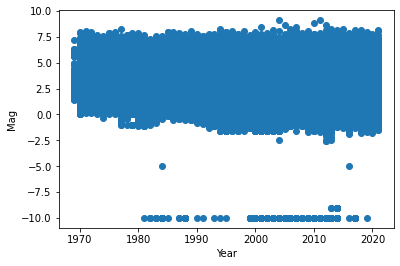

In [86]:
plt.scatter(quake_df["year"],quake_df['mag'])
plt.xlabel('Year')
plt.ylabel('Mag')
plt.show()